In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.category import UnitData
import matplotlib.colors as colors

In [3]:
def filter_to_decrease_nums(years, time_classes):
    """
    Filters out data points (year and time class) that don't have monotonically 
    decreasing time class.
    """
    new_years = []
    new_time_classes = []
    
    curr_lowest = float('inf')
    for i, num in enumerate(time_classes):
        if num < curr_lowest:
            new_years.append(years[i])
            new_time_classes.append(num)
            curr_lowest = num
            
    return new_years, new_time_classes

In [4]:
def clean_data():
    """
    Go through datastructures.csv and filter out irrelevant/incomplete data structures.
    """
    dataframe = pd.read_csv('Analysis/datastructures2.csv')
    dataframe = dataframe.replace(np.nan, '', regex=True)
#     dataframe = dataframe.drop('Domain', axis=1)
#     dataframe = dataframe.rename(columns={"Domain.1": "Domain"})
    
    dataframe = dataframe[
#                           (dataframe['Time Complexity Class'] != '#VALUE!') &
#                           (dataframe['Space Complexity Class'] != '#VALUE!') &
                          (dataframe["Looked at?"] != 0.001) &
                          (dataframe["Looked at?"] != 0.0) &
                          (dataframe["Year"] != "?") &
                          (dataframe["Year"] != "")
#                           (dataframe["Exact Problem Statement?"] == 1)
                        ]

    # Get rid of parallel, quantum, and approximate algorithms
#     dataframe = dataframe[(dataframe["Quantum?"] == 0) | (dataframe["Quantum?"] == "0")]
#     dataframe = dataframe[(dataframe["Parallel?"] == 0) | (dataframe["Parallel?"] == "0")]
#     dataframe = dataframe[(dataframe["Approximate?"] == 0) | (dataframe["Approximate?"] == "0")]


    dataframe.to_csv('Analysis/datastructures2.csv')
    return dataframe

In [5]:
data = clean_data()

In [6]:
ds_problems = set(data["Domain"])
#ds_problems.remove('Binary Tree')
ds_problems

{'Approximate Membership Query Filter (with delete)',
 'Approximate Membership Query Filter (without delete)',
 'Approximate Membership Query Filter (without insert or delete)',
 'Associative Array',
 'Binary Tree',
 'Binary Tree/Cryptography',
 'Double-ended Priority Queue',
 'Double-ended Priority Queue with Complementary Range Queries',
 'Hierarchical key-value store',
 'Locality Sensitive Hashing',
 'Monotone Priority Queue',
 'Nearest Neighbor Search',
 'Optimal Binary Search Tree (No Insert/Delete)',
 'Optimal Binary Search Tree (with Insert/Delete)',
 'Ordered Associative Array (Comparison)',
 'Ordered Associative Array (Non-Comparison), Large Universe',
 'Ordered Associative Array (Non-Comparison), Smaller Universe',
 'Orthogonal Range Search',
 'Orthogonal Range Search, Static',
 'Priority Queue',
 'Range Search',
 'Range Search, External Memory',
 'Rank/Select Data Structure (Static)',
 'Search Tree',
 'Spatial Data Structure',
 'String Search',
 'String Search, Online',
 'Tr

# Generate graphs for all data structures

In [7]:
def is_op(class_array):
    """
    Returns whether the array (column for a data structure operation) contains 
    float/int values (the time class).
    """
    for item in class_array:
        if type(item) is not float and type(item) is not int:
            return False
    return True

In [42]:
CLASSES = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
LABELS = ("O(1)", "O(lg lg n)", "O(lg n)", "poly(lg n)", "O(n^(1/2)", "O(n)", 
          "O(n lg n)", "O(n polylg(n))", "O(n^2)", "poly(n)", "O(exp(n))")

def generate_stacked_graph(domain_name):
    """
    Generate stacked graph for one data structure type.
    """
    ds = data[data["Domain"] == domain_name]
    ds = ds.sort_values("Year")
    
    years = list(ds["Year"])
    for i, val in enumerate(years):
        years[i] = int(val)
        
    # Space, Build, Insert, Delete, Find, Successor/Predecessor, Union, Min/Max, Increase-Key/Update
    # Push, Pop Most Recent, Pop Oldest, Nearest Neighbor, Range Search, Query
    space = list(ds["Space Class"])
    build = list(ds["Build Runtime Class"])
    insert = list(ds["Insert Runtime Class"])
    delete = list(ds["Delete Runtime Class"])
    find = list(ds["Find Runtime Class"])
    successor = list(ds["Successor/Predecessor Runtime Class"])
    union = list(ds["Union Runtime Class"])
    minmax = list(ds["Min/Max Runtime Class"])
    update = list(ds["Increase-Key/Update Runtime Class"])
    push = list(ds["Push Runtime Class"])
    poprecent = list(ds["Pop Most Recent Runtime Class"])
    popoldest = list(ds["Pop Oldest Runtime Class"])
    neighbor = list(ds["Nearest Neighbor Runtime Class"])
    search = list(ds["Range Search Runtime Class"])
    query = list(ds["Query Runtime Class"])
    
    op_count = 0
    
    if is_op(space):
        years_space, space_filtered = filter_to_decrease_nums(years, space)
        op_count += 1
    if is_op(build):
        years_build, build_filtered = filter_to_decrease_nums(years, build)
        op_count += 1
    if is_op(insert):
        years_insert, insert_filtered = filter_to_decrease_nums(years, insert)
        op_count += 1
    if is_op(delete):
        years_delete, delete_filtered = filter_to_decrease_nums(years, delete)
        op_count += 1
    if is_op(find):
        years_find, find_filtered = filter_to_decrease_nums(years, find)
        op_count += 1
    if is_op(successor):
        years_successor, successor_filtered = filter_to_decrease_nums(years, successor)
        op_count += 1
    if is_op(union):
        years_union, union_filtered = filter_to_decrease_nums(years, union)
        op_count += 1
    if is_op(minmax):
        years_minmax, minmax_filtered = filter_to_decrease_nums(years, minmax)
        op_count += 1
    if is_op(update):
        years_update, update_filtered = filter_to_decrease_nums(years, update)
        op_count += 1
    if is_op(push):
        years_push, push_filtered = filter_to_decrease_nums(years, push)
        op_count += 1
    if is_op(poprecent):
        years_poprecent, poprecent_filtered = filter_to_decrease_nums(years, poprecent)
        op_count += 1
    if is_op(popoldest):
        years_popoldest, popoldest_filtered = filter_to_decrease_nums(years, popoldest)
        op_count += 1
    if is_op(neighbor):
        years_neighbor, neighbor_filtered = filter_to_decrease_nums(years, neighbor)
        op_count += 1
    if is_op(search):
        years_search, search_filtered = filter_to_decrease_nums(years, search)
        op_count += 1
    if is_op(query):
        years_query, query_filtered = filter_to_decrease_nums(years, query)
        op_count += 1
    
    fig, ax = plt.subplots(op_count, 1, figsize=(9, op_count*1.6), sharex=True)
    colors = ["g", "b", "r", "y", "orange", "purple", "c", "salmon", "olive", "sienna",
              "deeppink", "slategrey", "yellowgreen", "teal", "maroon"]
    
    curr_ax = 0
    if is_op(space):
        ax[curr_ax].scatter(years, space, color=colors[0])
        # for i in range(len(years)):
        #     if space[i] > 5.99:
        #         ax[curr_ax].scatter([years[i]], [space[i]], color=colors[0], edgecolor="black", linewidth=2)
        ax[curr_ax].plot(years_space+[2100], space_filtered+[space[-1]], drawstyle='steps-post', color=colors[0])
        min_class, max_class = round(min(space)), round(max(space))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Space"])
        curr_ax += 1
    if is_op(build):
        ax[curr_ax].scatter(years, build, color=colors[1])
        # for i in range(len(years)):
        #     if build[i] > 6:
        #         ax[curr_ax].scatter([years[i]], [build[i]], color=colors[1], edgecolor="black", linewidth=2)
        ax[curr_ax].plot(years_build+[2100], build_filtered+[build[-1]], drawstyle='steps-post', color=colors[1])
        min_class, max_class = round(min(build)), round(max(build))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Build"])
        curr_ax += 1
    if is_op(insert):
        ax[curr_ax].scatter(years, insert, color=colors[2])
        # for i in range(len(years)):
        #     if insert[i] > 1:
        #         ax[curr_ax].scatter([years[i]], [insert[i]], color=colors[2], edgecolor="black", linewidth=2)
        ax[curr_ax].plot(years_insert+[2100], insert_filtered+[insert[-1]], drawstyle='steps-post', color=colors[2])
        min_class, max_class = round(min(insert)), round(max(insert))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Insert"])
        curr_ax += 1
    if is_op(delete):
        ax[curr_ax].scatter(years, delete, color=colors[3])
        # for i in range(len(years)):
        #     if delete[i] > 1:
        #         ax[curr_ax].scatter([years[i]], [delete[i]], color=colors[3], edgecolor="black", linewidth=2)
        ax[curr_ax].plot(years_delete+[2100], delete_filtered+[delete[-1]], drawstyle='steps-post', color=colors[3])
        min_class, max_class = round(min(delete)), round(max(delete))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Delete"])
        curr_ax += 1
    if is_op(find):
        ax[curr_ax].scatter(years, find, color=colors[4])
        # for i in range(len(years)):
        #     if find[i] > 1:
        #         ax[curr_ax].scatter([years[i]], [find[i]], color=colors[4], edgecolor="black", linewidth=2)
        ax[curr_ax].plot(years_find+[2100], find_filtered+[find[-1]], drawstyle='steps-post', color=colors[4])
        min_class, max_class = round(min(find)), round(max(find))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Find"])
        curr_ax += 1
    if is_op(successor):
        ax[curr_ax].scatter(years, successor, color=colors[5])
        ax[curr_ax].plot(years_successor+[2100], successor_filtered+[successor[-1]], drawstyle='steps-post', color=colors[5])
        min_class, max_class = round(min(successor)), round(max(successor))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Successor/Predecessor"])
        curr_ax += 1
    if is_op(union):
        ax[curr_ax].scatter(years, union, color=colors[6])
        ax[curr_ax].plot(years_union+[2100], union_filtered+[union[-1]], drawstyle='steps-post', color=colors[6])
        min_class, max_class = round(min(union)), round(max(union))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Union"])
        curr_ax += 1
    if is_op(minmax):
        ax[curr_ax].scatter(years, minmax, color=colors[7])
        ax[curr_ax].plot(years_minmax+[2100], minmax_filtered+[minmax[-1]], drawstyle='steps-post', color=colors[7])
        min_class, max_class = round(min(minmax)), round(max(minmax))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Min/Max"])
        curr_ax += 1
    if is_op(update):
        ax[curr_ax].scatter(years, update, color=colors[8])
        ax[curr_ax].plot(years_update+[2100], update_filtered+[update[-1]], drawstyle='steps-post', color=colors[8])
        min_class, max_class = round(min(update)), round(max(update))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Increase-Key/Update"])
        curr_ax += 1
    if is_op(push):
        ax[curr_ax].scatter(years, push, color=colors[9])
        ax[curr_ax].plot(years_push+[2100], push_filtered+[push[-1]], drawstyle='steps-post', color=colors[9])
        min_class, max_class = round(min(push)), round(max(push))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Push"])
        curr_ax += 1
    if is_op(poprecent):
        ax[curr_ax].scatter(years, poprecent, color=colors[10])
        ax[curr_ax].plot(years_poprecent+[2100], poprecent_filtered+[poprecent[-1]], drawstyle='steps-post', color=colors[10])
        min_class, max_class = round(min(poprecent)), round(max(poprecent))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Pop Most Recent"])
        curr_ax += 1
    if is_op(popoldest):
        ax[curr_ax].scatter(years, popoldest, color=colors[11])
        ax[curr_ax].plot(years_popoldest+[2100], popoldest_filtered+[popoldest[-1]], drawstyle='steps-post', color=colors[11])
        min_class, max_class = round(min(popoldest)), round(max(popoldest))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Pop Oldest"])
        curr_ax += 1
    if is_op(neighbor):
        ax[curr_ax].scatter(years, neighbor, color=colors[12])
        ax[curr_ax].plot(years_neighbor+[2100], neighbor_filtered+[neighbor[-1]], drawstyle='steps-post', color=colors[12])
        min_class, max_class = round(min(neighbor)), round(max(neighbor))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Nearest Neighbor"])
        curr_ax += 1
    if is_op(search):
        ax[curr_ax].scatter(years, search, color=colors[13])
        ax[curr_ax].plot(years_search+[2100], search_filtered+[search[-1]], drawstyle='steps-post', color=colors[13])
        min_class, max_class = round(min(search)), round(max(search))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Range Search"])
        curr_ax += 1
    if is_op(query):
        ax[curr_ax].scatter(years, query, color=colors[14])
        ax[curr_ax].plot(years_query+[2100], query_filtered+[query[-1]], drawstyle='steps-post', color=colors[14])
        min_class, max_class = round(min(query)), round(max(query))
        ax[curr_ax].set_yticks(CLASSES[min_class-1:max_class])
        ax[curr_ax].set_yticklabels(LABELS[min_class-1:max_class])
        ax[curr_ax].legend(["Query"])
        curr_ax += 1
    
    ax[0].set_title(domain_name)
    ax[curr_ax-1].set_xlabel("Year")
    fig.text(-0.01, 0.5, 'Complexity Class', ha='center', va='center', rotation='vertical')
    plt.xlim(years[0]-2, 2023)
    plt.savefig("stacked_graphs/" + domain_name.replace("/", "-")) 
    plt.show()

In [18]:
# for ds in ds_problems:
#    generate_stacked_graph(ds)

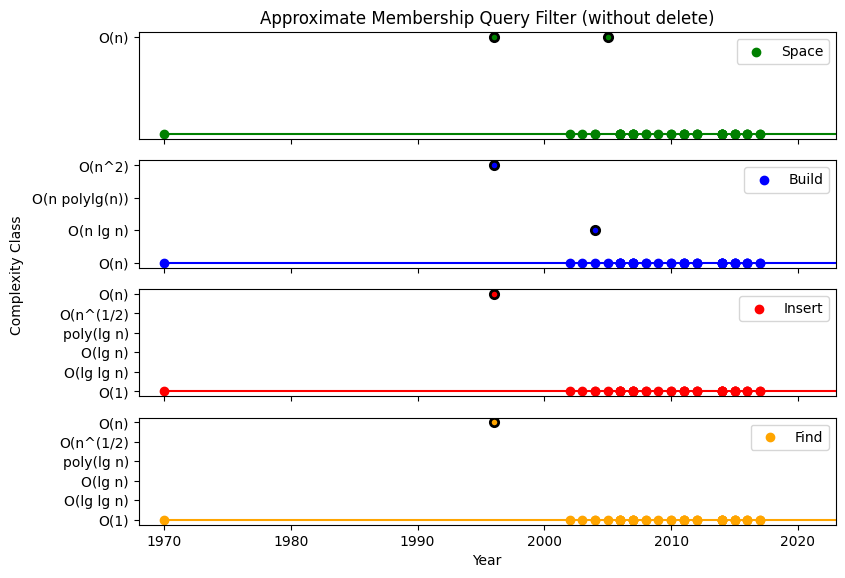

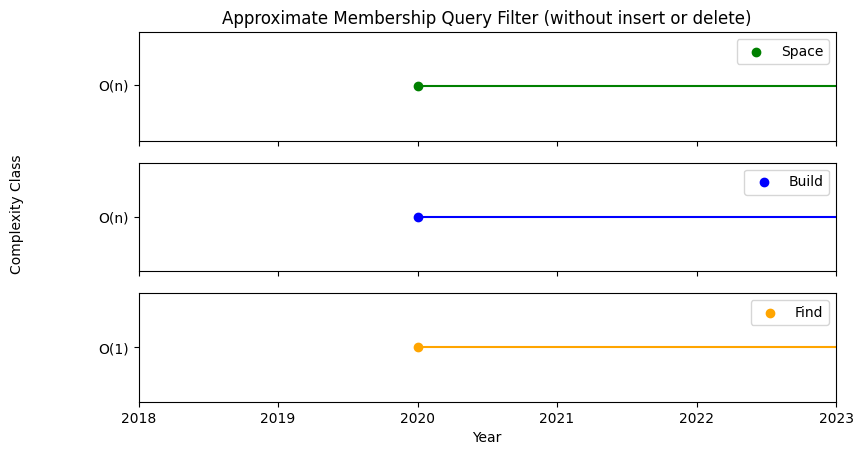

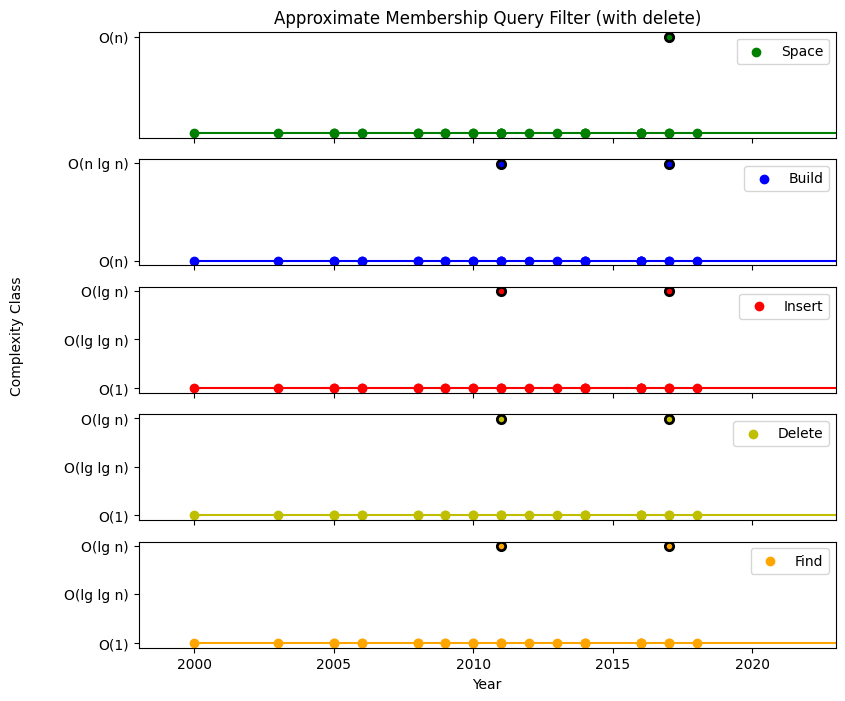

In [43]:
for ds in ds_problems:
    if "Approximate Membership Query Filter" in ds:
        generate_stacked_graph(ds)

## Priority Queue

In [11]:
priority_queue = data[data["Domain"] == "Priority Queue"]
priority_queue = priority_queue.sort_values("Year")

priority_queue = priority_queue[[
    "Year", 
    "Datastructure", 
    "Space", "Space Class", 
    "Build (Time)", "Build Runtime Class", #"Build Notes (constants, amortized?, randomized?, etc.)", 
    "Insert (Time)", "Insert Runtime Class", #"Insert Notes (constants, amortized?, randomized?, etc.)",
    "Delete (Time)", "Delete Runtime Class", #"Delete Notes (constants, amortized?, randomized?, etc.)", 
    "Union (Time)", "Union Runtime Class", #"Union Notes (constants, amortized?, randomized?, etc.)", 
    "Min/Max (Time)", "Min/Max Runtime Class", #"Min/Max Notes (constants, amortized?, randomized?, etc.)", 
    "Increase-Key/Update (Time)", "Increase-Key/Update Runtime Class", #"Increase-Key/Update Notes (constants, amortized?, randomized?, etc.)", 
   ]]

In [12]:
priority_queue

,Year,Datastructure,Space,Space Class,Build (Time),Build Runtime Class,Insert (Time),Insert Runtime Class,Delete (Time),Delete Runtime Class,Union (Time),Union Runtime Class,Min/Max (Time),Min/Max Runtime Class,Increase-Key/Update (Time),Increase-Key/Update Runtime Class
66,1964,Binary Heap,O(n),6.0,O(n),6.00,O(lg n),3.0,O(lg n),3.0,O(n),6.0,O(1),1.0,O(lg n),3.0
68,1972,Height-biased Leftist Heap,O(n),6.0,O(n),6.00,O(lg n),3.0,O(lg n),3.0,O(lg n),3.0,O(1),1.0,O(lg n),3.0
67,1975,d-ary Heap,O(n),6.0,O((n lg n)/(lg d))?,7.00,O((lg n)/(lg d)),3.0,O((d lg n)/(lg d)),3.0,O(n)?,6.0,O(1),1.0,O((lg n)/(lg d)),3.0
70,1978,Binomial Heap,O(n),6.0,O(n),6.00,O(1),1.0,O(lg n),3.0,O(lg n),3.0,O(1),1.0,O(lg n),3.0
92,1980,Beap,n + O(1),6.0,O(n lg n),7.00,O(sqrt(n)),5.0,O(sqrt(n)),5.0,O(n lg n)?,7.0,O(1),1.0,O(sqrt(n))?,5.0
103,1981,Leonardo Heap,O(n),6.0,O(n)?,6.00,O(lg n),3.0,O(lg n),3.0,O(n lg n)?,7.0,O(1),1.0,O(lg n),3.0
87,1986,Bottom-Up Skew Heap,O(n)?,6.0,O(n),6.00,O(1),1.0,O(lg n),3.0,O(1),1.0,O(1),1.0,O(lg n)?,3.0
74,1986,Pairing Heap,O(n),6.0,O(n),6.00,O(2^(2*sqrt(lg lg n))),2.95,O(lg n),3.0,O(2^(2*sqrt(lg lg n))),2.95,O(1),1.0,O(2^(2*sqrt(lg lg n))),2.95
86,1986,Top-Down Skew Heap,O(n)?,6.0,O(n),6.00,O(lg n),3.0,O(lg n),3.0,O(lg n),3.0,O(1),1.0,O(lg n)?,3.0
71,1987,Fibonacci Heap,O(n),6.0,O(n),6.00,O(1),1.0,O(lg n),3.0,O(1),1.0,O(1),1.0,O(1),1.0


In [13]:
# priority_queue.loc[47]["Parameters"]

In [14]:
pq_years = list(priority_queue["Year"])
for i, val in enumerate(pq_years):
    pq_years[i] = int(val)

In [15]:
pq_build_time = priority_queue["Build (Time)"]
pq_insert_time = priority_queue["Insert (Time)"]
pq_delete_time = priority_queue["Delete (Time)"]
pq_union_time = priority_queue["Union (Time)"]
pq_minmax_time = priority_queue["Min/Max (Time)"]
pq_update_time = priority_queue["Increase-Key/Update (Time)"]

pq_build_class = list(priority_queue["Build Runtime Class"])
pq_insert_class = list(priority_queue["Insert Runtime Class"])
pq_delete_class = list(priority_queue["Delete Runtime Class"])
pq_union_class = list(priority_queue["Union Runtime Class"])
pq_minmax_class = list(priority_queue["Min/Max Runtime Class"])
pq_update_class = list(priority_queue["Increase-Key/Update Runtime Class"])

In [16]:
pq_years_build_class, pq_build_class_filtered = filter_to_decrease_nums(pq_years, pq_build_class)
pq_years_insert_class, pq_insert_class_filtered = filter_to_decrease_nums(pq_years, pq_insert_class)
pq_years_delete_class, pq_delete_class_filtered = filter_to_decrease_nums(pq_years, pq_delete_class)
pq_years_union_class, pq_union_class_filtered = filter_to_decrease_nums(pq_years, pq_union_class)
pq_years_minmax_class, pq_minmax_class_filtered = filter_to_decrease_nums(pq_years, pq_minmax_class)
pq_years_update_class, pq_update_class_filtered = filter_to_decrease_nums(pq_years, pq_update_class)

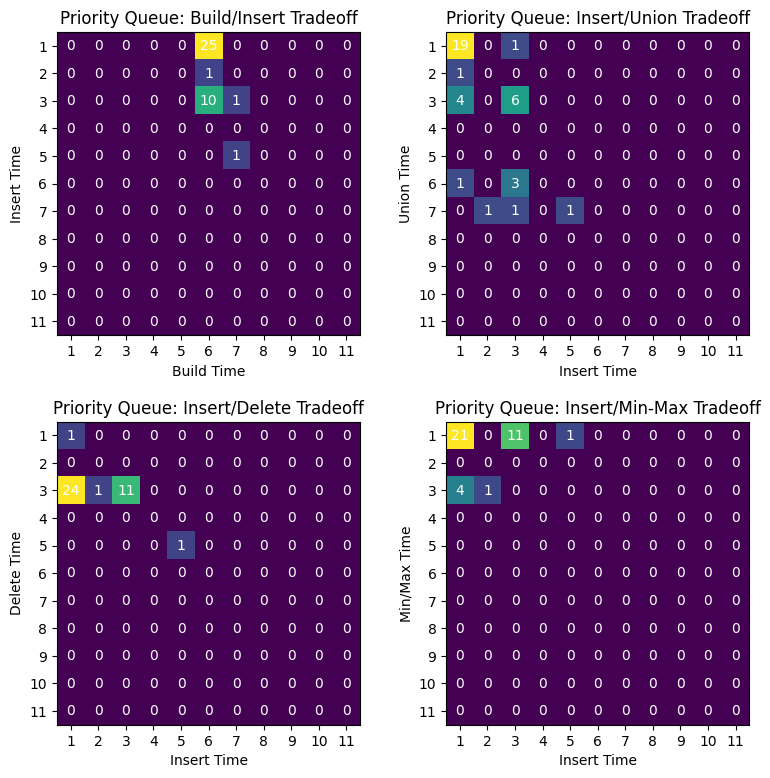

In [17]:
class_range = [n for n in range(1, 12)]
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

### build/insert
build_insert = np.array([[0 for _ in range(11)] for _ in range(11)])
for i in range(len(pq_years)):
    build_idx = round(pq_build_class[i])-1
    insert_idx = round(pq_insert_class[i])-1
    build_insert[insert_idx][build_idx] += 1
    
im = ax[0][0].imshow(build_insert, norm=colors.PowerNorm(gamma=0.5))
ax[0][0].set_title("Priority Queue: Build/Insert Tradeoff")
ax[0][0].set_xlabel("Build Time")
ax[0][0].set_ylabel("Insert Time")

# Loop over data dimensions and create text annotations.
for i in range(11):
    for j in range(11):
        text = ax[0][0].text(j, i, build_insert[i, j], ha="center", va="center", color="w")


### insert/union
insert_union = np.array([[0 for _ in range(11)] for _ in range(11)])
for i in range(len(pq_years)):
    insert_idx = round(pq_insert_class[i])-1
    union_idx = round(pq_union_class[i])-1
    insert_union[union_idx][insert_idx] += 1
    
im = ax[0][1].imshow(insert_union, norm=colors.PowerNorm(gamma=0.5))
ax[0][1].set_title("Priority Queue: Insert/Union Tradeoff")
ax[0][1].set_xlabel("Insert Time")
ax[0][1].set_ylabel("Union Time")

for i in range(11):
    for j in range(11):
        text = ax[0][1].text(j, i, insert_union[i, j], ha="center", va="center", color="w")

        
### insert/delete
insert_delete = np.array([[0 for _ in range(11)] for _ in range(11)])
for i in range(len(pq_years)):
    insert_idx = round(pq_insert_class[i])-1
    delete_idx = round(pq_delete_class[i])-1
    insert_delete[delete_idx][insert_idx] += 1
    
im = ax[1][0].imshow(insert_delete, norm=colors.PowerNorm(gamma=0.5))
ax[1][0].set_title("Priority Queue: Insert/Delete Tradeoff")
ax[1][0].set_xlabel("Insert Time")
ax[1][0].set_ylabel("Delete Time")

for i in range(11):
    for j in range(11):
        text = ax[1][0].text(j, i, insert_delete[i, j], ha="center", va="center", color="w")
        
        
### insert/minmax
insert_minmax = np.array([[0 for _ in range(11)] for _ in range(11)])
for i in range(len(pq_years)):
    insert_idx = round(pq_insert_class[i])-1
    minmax_idx = round(pq_minmax_class[i])-1
    insert_minmax[minmax_idx][insert_idx] += 1
    
im = ax[1][1].imshow(insert_minmax, norm=colors.PowerNorm(gamma=0.5))
ax[1][1].set_title("Priority Queue: Insert/Min-Max Tradeoff")
ax[1][1].set_xlabel("Insert Time")
ax[1][1].set_ylabel("Min/Max Time")

for i in range(11):
    for j in range(11):
        text = ax[1][1].text(j, i, insert_minmax[i, j], ha="center", va="center", color="w")
        
        
# Show all ticks and label them with the respective list entries
for i in range(2):
    for j in range(2):
        ax[i][j].set_xticks(np.arange(11), labels=class_range)
        ax[i][j].set_yticks(np.arange(11), labels=class_range)
        
plt.tight_layout(pad=1.5)
plt.show()